## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.decomposition import PCA

## Load Dataset

In [2]:
vehicle = pd.read_csv('vehicle-1.csv')

## Peek into the data

In [3]:
vehicle.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

## shape of the data

In [4]:
vehicle.shape

(846, 19)

There are 846 rows and 19 columns

## 5 Point Summary

In [5]:
vehicle.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

#### There seems to be no outlier

## Pairplot 

## Check the datatype

In [6]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

#### class column is alone object type

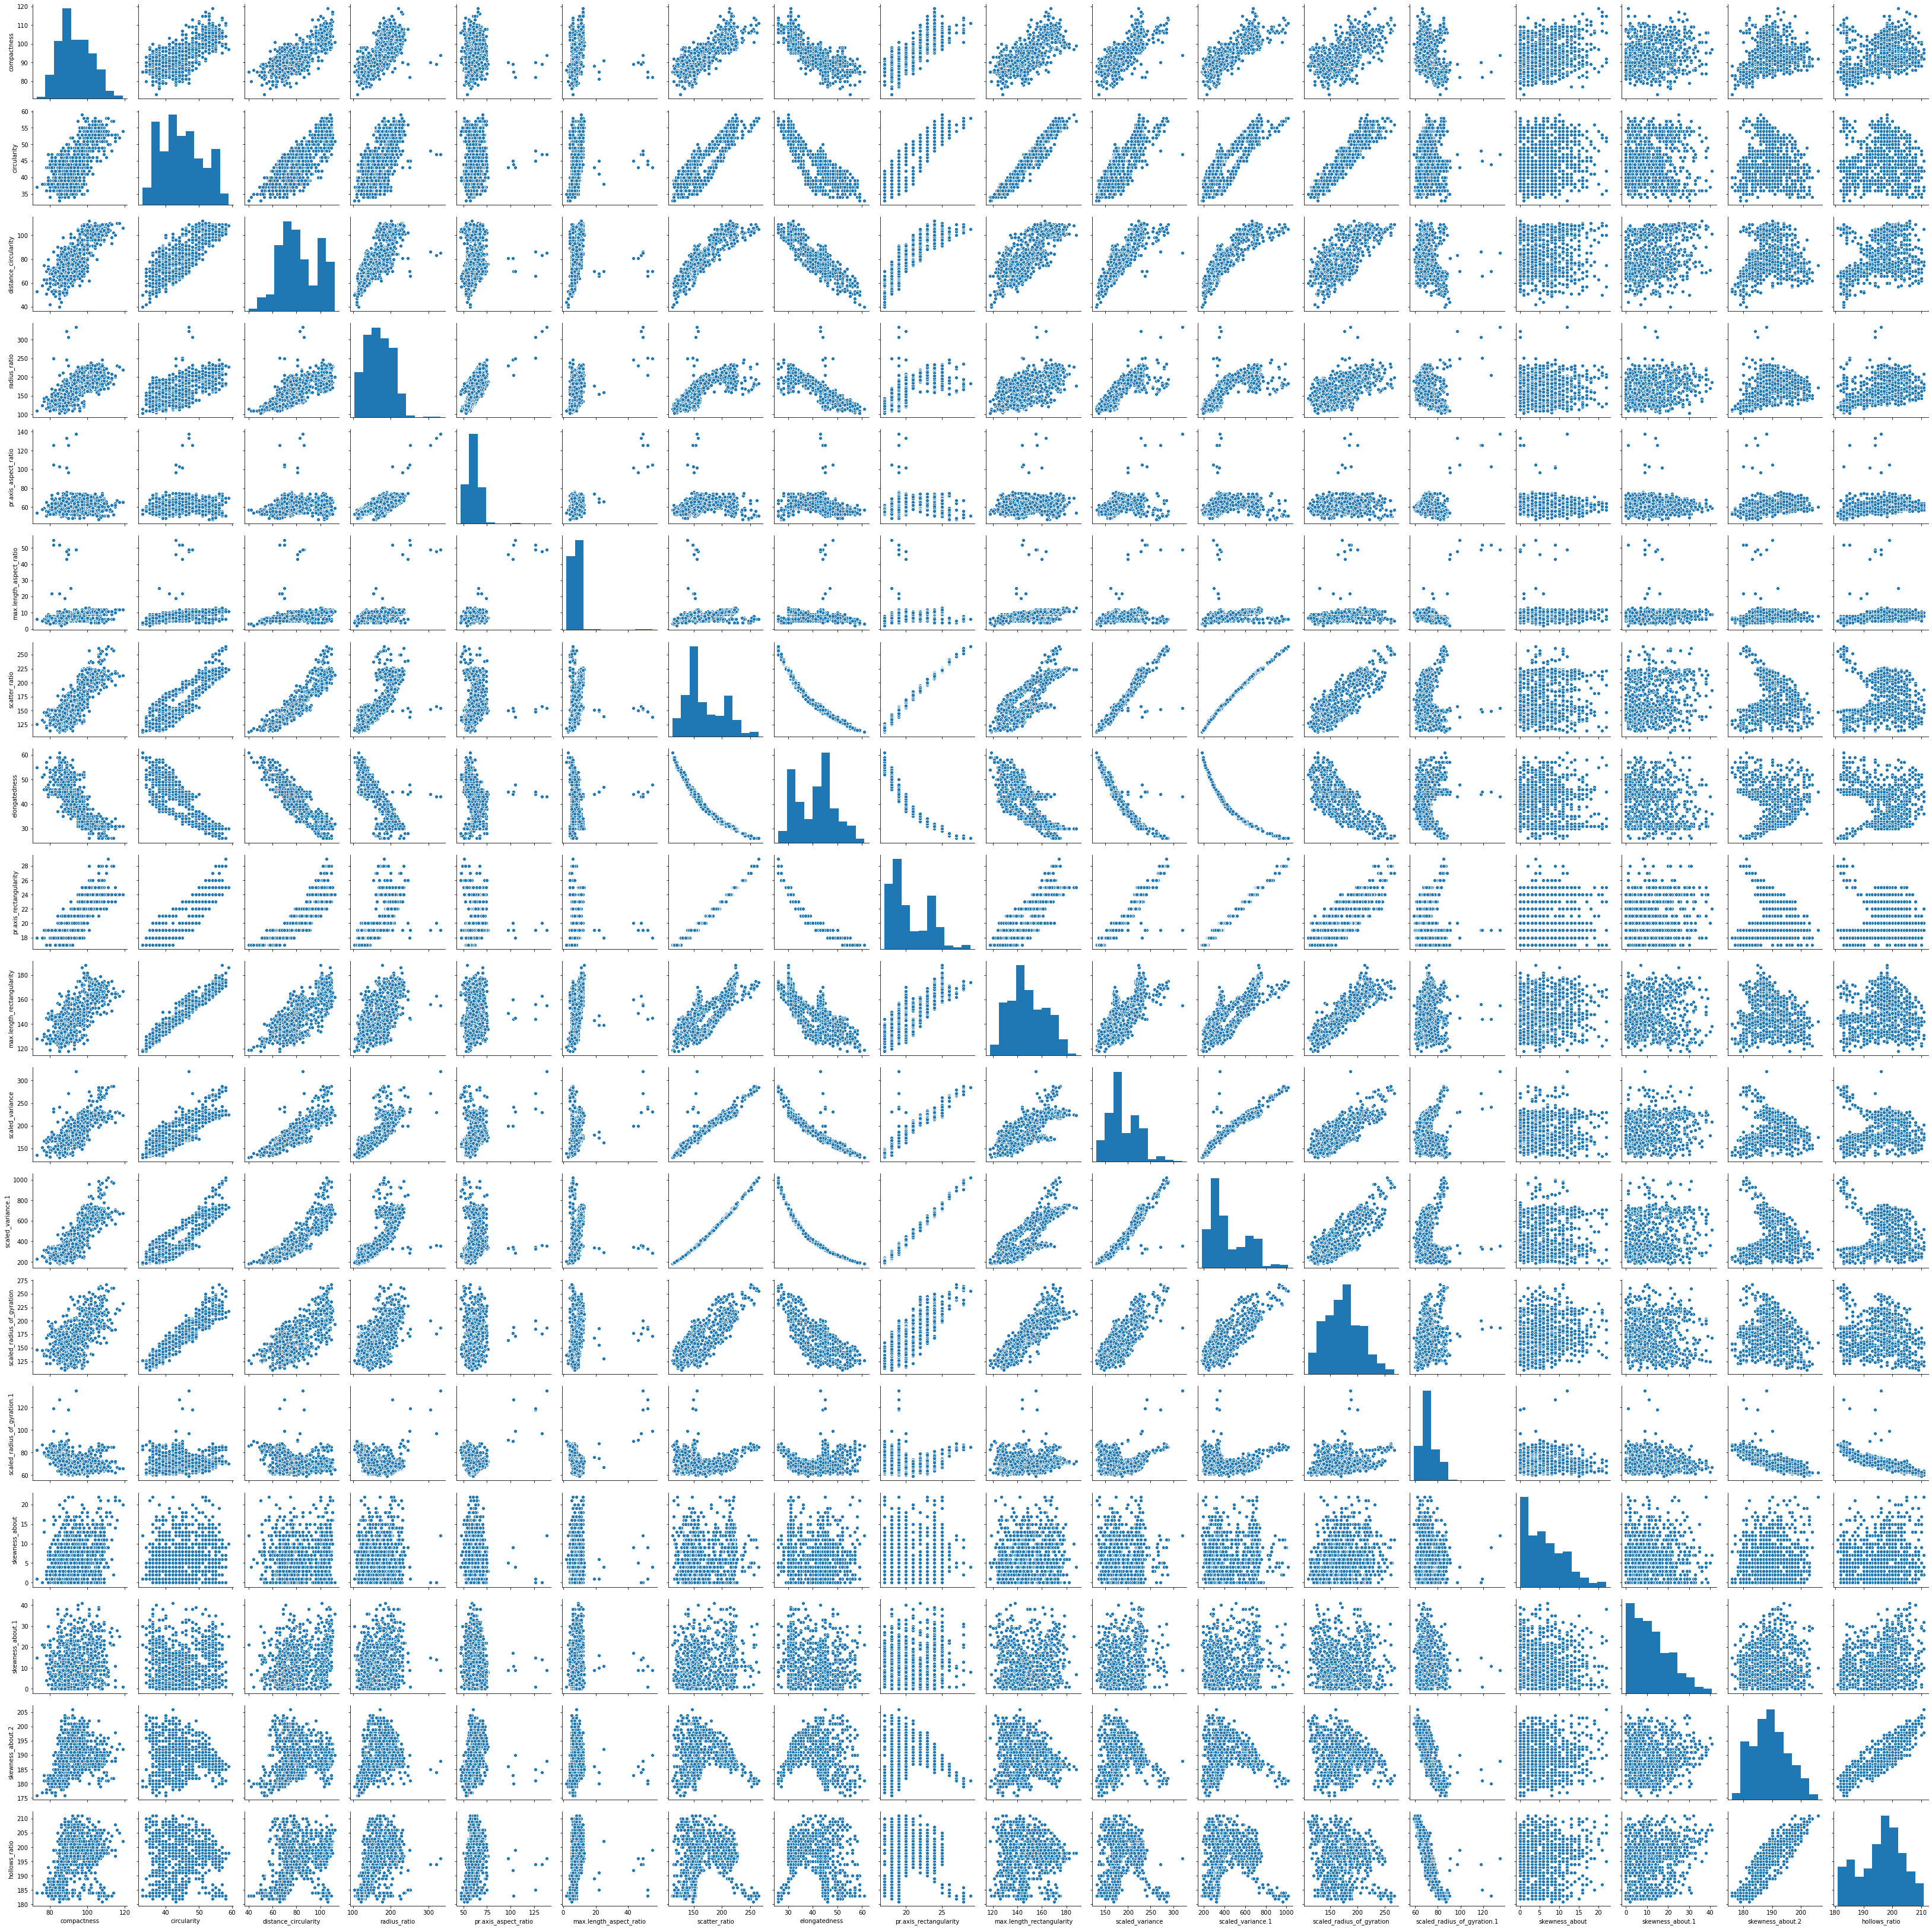

In [7]:
sns.pairplot(vehicle)

In [8]:
vehicle.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.689786              0.791707   
circularity                     0.689786     1.000000              0.797180   
distance_circularity            0.791707     0.797180              1.000000   
radius_ratio                    0.691081     0.625051              0.771748   
pr.axis_aspect_ratio            0.091779     0.154283              0.158684   
max.length_aspect_ratio         0.148249     0.251407              0.264621   
scatter_ratio                   0.812770     0.858265              0.907949   
elongatedness                  -0.788736    -0.827246             -0.913020   
pr.axis_rectangularity          0.814248     0.856603              0.896273   
max.length_rectangularity       0.676143     0.965729              0.775149   
scaled_variance                 0.764361     0.806791              0.865710   
scaled_variance.1               0.818674     0.850863              0.890541   
scaled_radius_of_gyration       0.585845     0.935950              0.706950   
scaled_radius_of_gyration.1    -0.250603     0.053080             -0.227001   
skewness_about                  0.236685     0.144968              0.114665   
skewness_about.1                0.157670    -0.011869              0.266049   
skewness_about.2                0.298528    -0.106339              0.146027   
hollows_ratio                   0.365552     0.045652              0.333648   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.691081              0.091779   
circularity                      0.625051              0.154283   
distance_circularity             0.771748              0.158684   
radius_ratio                     1.000000              0.665363   
pr.axis_aspect_ratio             0.665363              1.000000   
max.length_aspect_ratio          0.450486              0.648861   
scatter_ratio                    0.738480              0.103832   
elongatedness                   -0.792946             -0.183492   
pr.axis_rectangularity           0.712744              0.079566   
max.length_rectangularity        0.571083              0.127322   
scaled_variance                  0.798294              0.273738   
scaled_variance.1                0.725598              0.089750   
scaled_radius_of_gyration        0.541325              0.122454   
scaled_radius_of_gyration.1     -0.181520              0.152860   
skewness_about                   0.049112             -0.058539   
skewness_about.1                 0.174469             -0.032180   
skewness_about.2                 0.382912              0.240201   
hollows_ratio                    0.472339              0.267760   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.812770   
circularity                                 0.251407       0.858265   
distance_circularity                        0.264621       0.907949   
radius_ratio                                0.450486       0.738480   
pr.axis_aspect_ratio                        0.648861       0.103832   
max.length_aspect_ratio                     1.000000       0.165998   
scatter_ratio                               0.165998       1.000000   
elongatedness                              -0.180053      -0.973504   
pr.axis_rectangularity                      0.161603       0.992078   
max.length_rectangularity                   0.305943       0.810017   
scaled_variance                             0.319033       0.951672   
scaled_variance.1                           0.143745       0.996328   
scaled_radius_of_gyration                   0.189752       0.800577   
scaled_radius_of_gyration.1                 0.295638      -0.028006   
skewness_about                              0.015446       0.074376   
skewness_about.1                            0.043491       0.213512   
skewness_about.2                           -0.

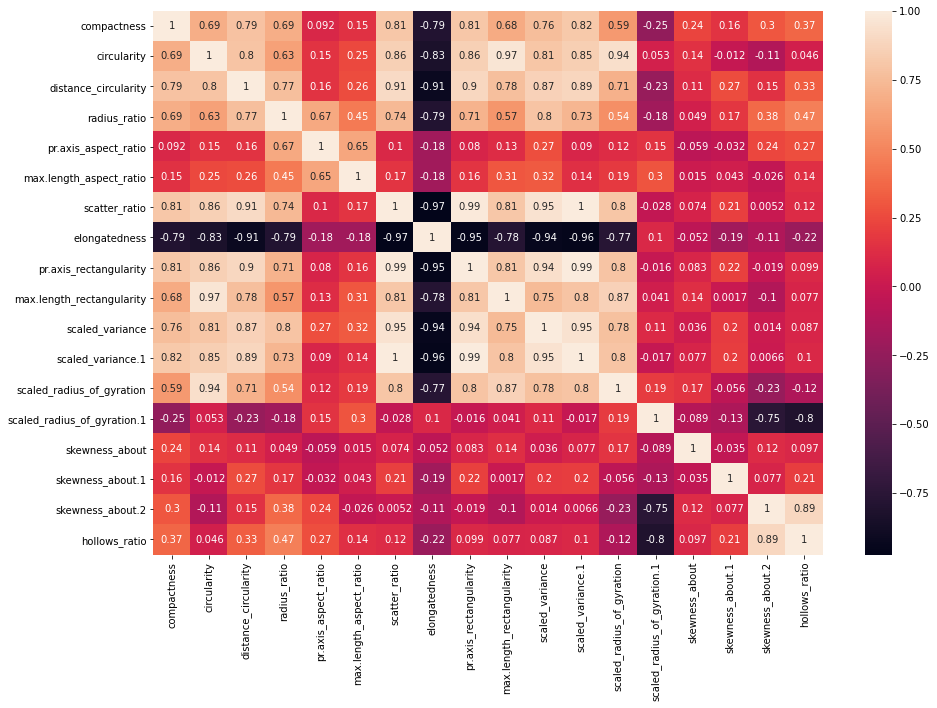

In [9]:
plt.figure(figsize=(15, 10))
sns.heatmap(vehicle.corr(), annot=True)

#### From above Corr heat map, we can see that there are many pairs which are highly correlated. 
#### Elongatedness dimension have correlation with almost 10 columns having correlation value below -0.7, skewness_about.2 and scaled_radius_of_gyration.1 have a correlation of -0.75, hollows_ratio and scaled_radius_of_gyration.1 have a correlation of -0.8, scatter_ratio has correlation value above 0.7 in 8 pairs
#### scaled_variance.1 and scatter_ratio have a correlation of 1, max.length_rectangularity and circularity have a correlation of 0.97, scaled_radius_of_gyration and circularity have a correlation of 0.94, scaled_variance and scatter_ratio have a correlation of 0.95,  pr.axis_rectangularity and scatter_ratio have a correlation of 0.99, scaled_variance and pr.axis_rectangularity have a correlation of 0.94, scaled_variance.1 and  pr.axis_rectangularity have a correlation of 0.99, scaled_variance.1 and scaled_variance have a correlation of 0.95. 
#### Hence the above columns can be dropped and it must not affect the accuracy much


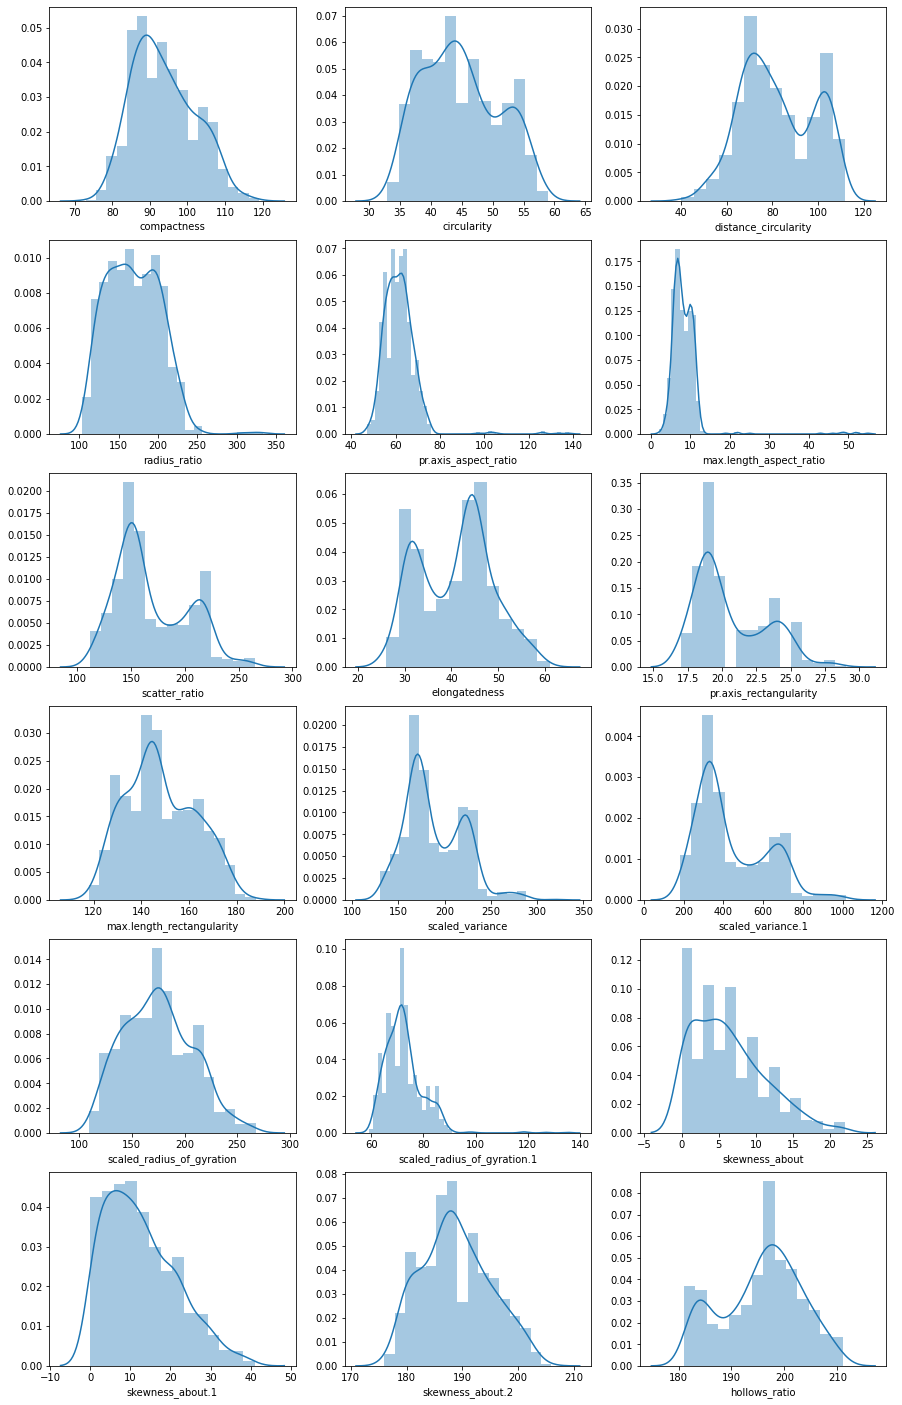

In [10]:
fig, ax = plt.subplots(6,3, figsize = (15,25))
col = 0
for r in range(6):
    for c in range(3):
        sns.distplot(vehicle[vehicle.columns[col]], ax = ax[r][c])
        col += 1

#### There are few columns with normal distributions and few other columns which has 2 peaks 

#### scaled_variance, scaled_variance1 and skewness_about.1 is right skewed

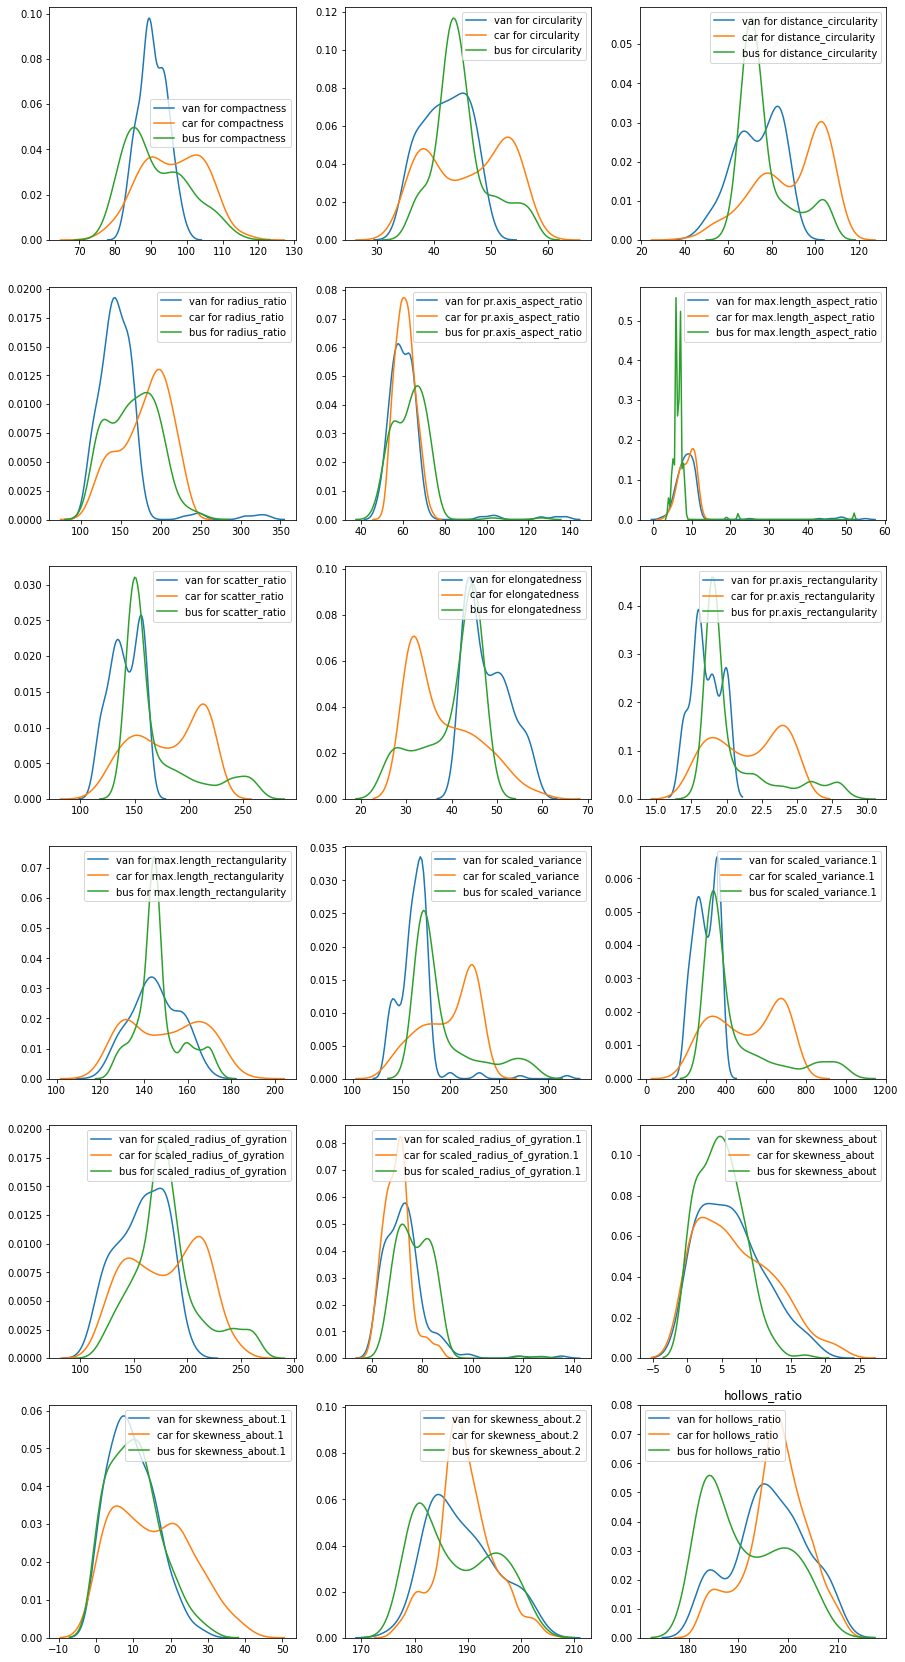

In [11]:
fig, ax = plt.subplots(6,3, figsize = (15,30))
col = 0
for r in range(6):
    for c in range(3):
        sns.kdeplot(vehicle[vehicle['class'] == 'van'][vehicle.columns[col]], ax = ax[r][c], label = 'van for ' + vehicle.columns[col])
        sns.kdeplot(vehicle[vehicle['class'] == 'car'][vehicle.columns[col]], ax = ax[r][c], label = 'car for ' + vehicle.columns[col])
        sns.kdeplot(vehicle[vehicle['class'] == 'bus'][vehicle.columns[col]], ax = ax[r][c], label = 'bus for ' + vehicle.columns[col])
        plt.title(vehicle.columns[col])
        col += 1


#### Higher peaks are in van and bus class mostly for many dimensions


#### car seems to be of higher spread across a very wide range of values

#### max.length_aspect_ratio has more number of values between 5-10 for bus class

#### skewness_about has equal frequency for for all class with bus class having a little high freq

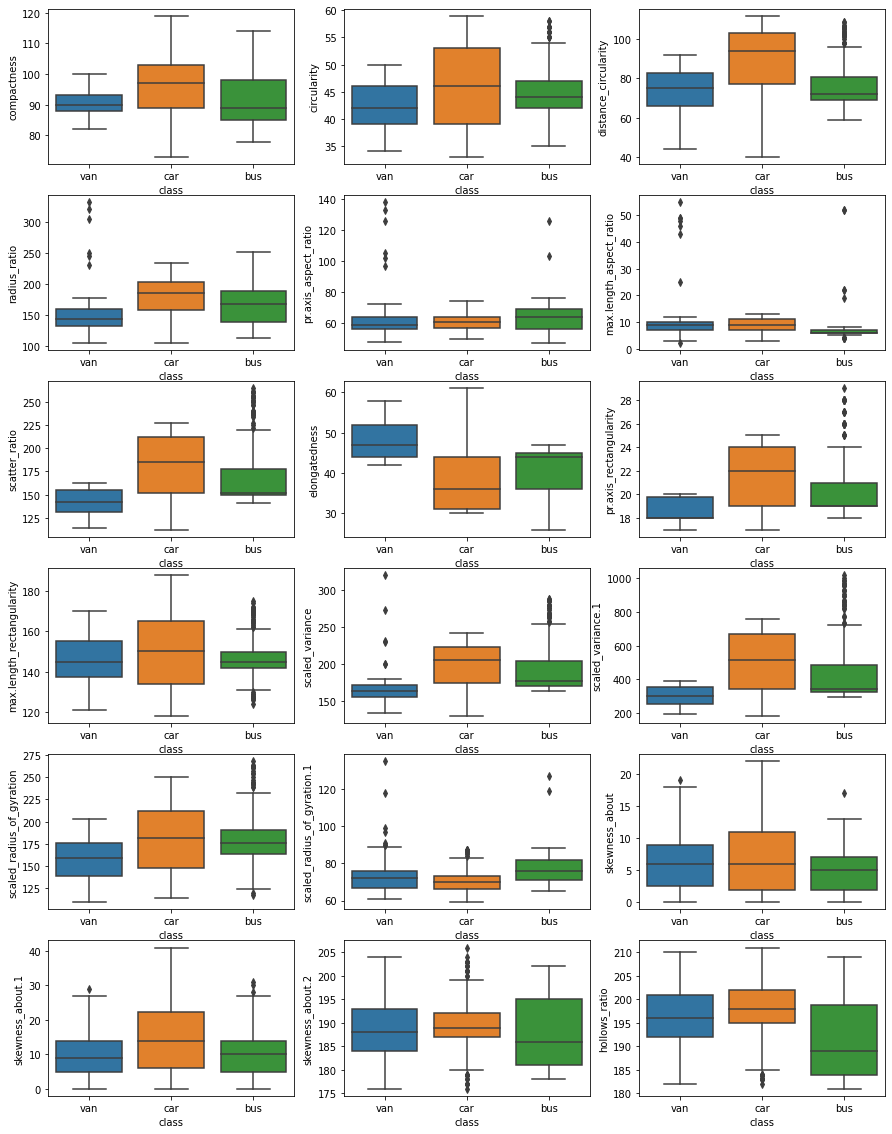

In [12]:
fig, ax = plt.subplots(6,3, figsize = (15,20))
col = 0
for r in range(6):
    for c in range(3):
        sns.boxplot(x = 'class', y = vehicle.columns[col], data = vehicle, ax = ax[r][c])
        col += 1

#### There are no outliers in compactness, elongatedness. Rest all dimensions have outliers.
#### Many outliers seems to be in bus class.
#### skewness_about.2, hollows_ratio has outliers in car class alone 
#### circularity, distance_circularity, scatter_ratio, pr.axis_rectangularity, max.length_rectangularity, scaled_variance.1, scaled_radius_of_gyration has outliers in bus class
#### radius_ratio has outliers only in van class

In [13]:
vehicle['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

<BarContainer object of 3 artists>

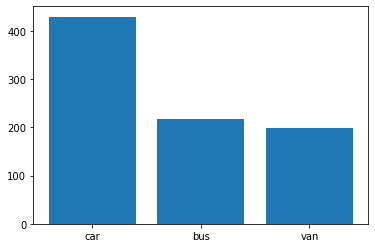

In [14]:
plt.bar(vehicle['class'].value_counts().index, vehicle['class'].value_counts())

Car seems to have more values and it is obvious as there are 2 car values involved

## Convert it to Numerical values

In [15]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
vehicle['class'] = labelencoder.fit_transform(vehicle['class'])

## Check for null values

In [16]:
vehicle.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

#### There are null values present

## Since there are only 846 rows, instead of dropping the rows we can update those values with mean/median

In [17]:
vehicle.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    0.977541    0.702130    0.0    0.00   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0  
class                          1.0    1.0     2.0

## Update missing Values

In [18]:
for col in vehicle.columns:
    vehicle.loc[vehicle[col].isnull(), col] = vehicle[col].median()

In [19]:
vehicle.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

All the Null values is replaced with its median

## Split data into input and output

In [7]:
x = vehicle.loc[:, vehicle.columns != 'class']
y = vehicle['class']

## Scale the data

In [9]:
x_scaled = x.apply(zscore)

## Split into train and test

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 1)

## SVM

In [23]:
g_list = []
c_list = []
score_list = []
for g in [0.01, 0.001, 0.0001]:
    for c in range(1,15):
        g_list.append(g)
        c_list.append(c)
        print(g)
        print(c)
        svc = SVC(gamma = g, C = c)
        svc.fit(x_train, y_train)
        model_score = svc.score(x_test, y_test)
        print(model_score)
        score_list.append(model_score)

0.01
1
0.9647058823529412
0.01
2
0.9705882352941176
0.01
3
0.9705882352941176
0.01
4
0.9705882352941176
0.01
5
0.9764705882352941
0.01
6
0.9764705882352941
0.01
7
0.9764705882352941
0.01
8
0.9764705882352941
0.01
9
0.9764705882352941
0.01
10
0.9764705882352941
0.01
11
0.9764705882352941
0.01
12
0.9764705882352941
0.01
13
0.9764705882352941
0.01
14
0.9764705882352941
0.001
1
0.5882352941176471
0.001
2
0.8176470588235294
0.001
3
0.8764705882352941
0.001
4
0.8941176470588236
0.001
5
0.888235294117647
0.001
6
0.9058823529411765
0.001
7
0.9176470588235294
0.001
8
0.9235294117647059
0.001
9
0.9294117647058824
0.001
10
0.9352941176470588
0.001
11
0.9352941176470588
0.001
12
0.9352941176470588
0.001
13
0.9411764705882353
0.001
14
0.9411764705882353
0.0001
1
0.5294117647058824
0.0001
2
0.5294117647058824
0.0001
3
0.5294117647058824
0.0001
4
0.5294117647058824
0.0001
5
0.5352941176470588
0.0001
6
0.5352941176470588
0.0001
7
0.5352941176470588
0.0001
8
0.5470588235294118
0.0001
9
0.57058823529411

In [24]:
index = score_list.index(max(score_list))
print('Optimum value of gamma is', g_list[index] , 'and C is', c_list[index])

Optimum value of gamma is 0.01 and C is 5


## Optimum value of gamma and C is 0.01 and 5 Respectively

In [25]:
svc = SVC(gamma = 0.01, C = 5)
svc.fit(x_train, y_train)
model_score = svc.score(x_test, y_test)
y_pred = svc.predict(x_test)
print('Model Accuracy is',metrics.accuracy_score(y_test, y_pred) * 100)

Model Accuracy is 97.6470588235294


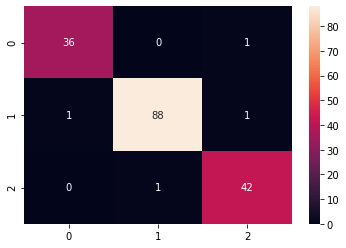

In [26]:
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)), annot = True)

In [27]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        37
         1.0       0.98      0.99      0.98        89
         2.0       0.98      0.95      0.97        44

    accuracy                           0.98       170
   macro avg       0.98      0.97      0.97       170
weighted avg       0.98      0.98      0.98       170



### Model Accuracy with raw data SVM is 97.64%

## Dropping all the correlated columns and finding the accuracy

In [28]:
x_reduced = vehicle.drop(['class', 'scaled_variance.1', 'scaled_radius_of_gyration', 'scaled_variance', 'pr.axis_rectangularity'], axis = 1)
y = vehicle['class']

In [29]:
x_reduced_scaled = x_reduced.apply(zscore)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x_reduced_scaled, y, test_size = 0.2, random_state = 1)

In [31]:
g_list = []
c_list = []
score_list = []
for g in [0.01, 0.001, 0.0001]:
    for c in range(1,15):
        g_list.append(g)
        c_list.append(c)
        print(g)
        print(c)
        svc = SVC(gamma = g, C = c)
        svc.fit(x_train, y_train)
        model_score = svc.score(x_test, y_test)
        print(model_score)
        score_list.append(model_score)

0.01
1
0.9588235294117647
0.01
2
0.9647058823529412
0.01
3
0.9647058823529412
0.01
4
0.9647058823529412
0.01
5
0.9705882352941176
0.01
6
0.9705882352941176
0.01
7
0.9705882352941176
0.01
8
0.9764705882352941
0.01
9
0.9764705882352941
0.01
10
0.9823529411764705
0.01
11
0.9823529411764705
0.01
12
0.9764705882352941
0.01
13
0.9764705882352941
0.01
14
0.9705882352941176
0.001
1
0.5588235294117647
0.001
2
0.7235294117647059
0.001
3
0.8470588235294118
0.001
4
0.8764705882352941
0.001
5
0.8941176470588236
0.001
6
0.9058823529411765
0.001
7
0.9117647058823529
0.001
8
0.9117647058823529
0.001
9
0.9294117647058824
0.001
10
0.9235294117647059
0.001
11
0.9235294117647059
0.001
12
0.9294117647058824
0.001
13
0.9294117647058824
0.001
14
0.9352941176470588
0.0001
1
0.5294117647058824
0.0001
2
0.5294117647058824
0.0001
3
0.5294117647058824
0.0001
4
0.5294117647058824
0.0001
5
0.5294117647058824
0.0001
6
0.5294117647058824
0.0001
7
0.5235294117647059
0.0001
8
0.5294117647058824
0.0001
9
0.5470588235294

In [32]:
index = score_list.index(max(score_list))
print('Optimum value of gamma is', g_list[index] , 'and C is', c_list[index])

Optimum value of gamma is 0.01 and C is 10


In [33]:
svc = SVC(gamma = 0.01, C = 10)
svc.fit(x_train, y_train)
model_score = svc.score(x_test, y_test)
y_pred = svc.predict(x_test)
print('Model Accuracy is',metrics.accuracy_score(y_test, y_pred) * 100)

Model Accuracy is 98.23529411764706


### Model Accuracy with raw data after dropping all the correlated column using SVM is 98.23%. Accuracy seems to be improved a bit after dropping few columns

## PCA

In [34]:
pca = PCA(n_components=18)
pca.fit(x_scaled)

PCA(n_components=18)

In [35]:
pca.explained_variance_

array([9.40460261e+00, 3.01492206e+00, 1.90352502e+00, 1.17993747e+00,
       9.17260633e-01, 5.39992629e-01, 3.58870118e-01, 2.21932456e-01,
       1.60608597e-01, 9.18572234e-02, 6.64994118e-02, 4.66005994e-02,
       3.57947189e-02, 2.74120657e-02, 2.05792871e-02, 1.79166314e-02,
       1.00257898e-02, 2.96445743e-03])

In [36]:
np.cumsum(pca.explained_variance_ratio_)

array([0.52186034, 0.68915802, 0.79478441, 0.86025901, 0.9111577 ,
       0.94112183, 0.96103549, 0.97335049, 0.98226265, 0.98735979,
       0.99104984, 0.9936357 , 0.99562195, 0.99714304, 0.99828498,
       0.99927917, 0.9998355 , 1.        ])

Text(0, 0.5, 'Variation Explained')

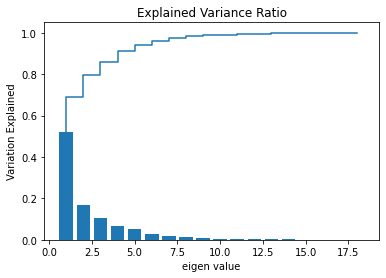

In [37]:
plt.bar(range(1,19),pca.explained_variance_ratio_)
plt.step(range(1,19),np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained Variance Ratio')
plt.xlabel('eigen value')
plt.ylabel('Variation Explained')

### 7 Dimensions seems to explain 95% ratio

In [38]:
pca7 = PCA(n_components=7)
pca7.fit(x_scaled)
x_scaled_pca7 = pca7.transform(x_scaled)

### Train test split after PCA

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled_pca7, y, test_size = 0.2, random_state = 1)

### Train SVM after PCA with same gamma and C values

In [40]:
svc = SVC(gamma = 0.01, C = 5)
svc.fit(x_train, y_train)
model_score = svc.score(x_test, y_test)
y_pred = svc.predict(x_test)
print('Model Accuracy is',metrics.accuracy_score(y_test, y_pred))

Model Accuracy is 0.9352941176470588


### Model Accuracy with SVM with Dimensionality reduction is 93.52%

In [41]:
g_list = []
c_list = []
score_list = []
for g in [0.01, 0.001, 0.0001]:
    for c in range(1,15):
        g_list.append(g)
        c_list.append(c)
        print(g)
        print(c)
        svc = SVC(gamma = g, C = c)
        svc.fit(x_train, y_train)
        model_score = svc.score(x_test, y_test)
        print(model_score)
        score_list.append(model_score)

0.01
1
0.8941176470588236
0.01
2
0.9117647058823529
0.01
3
0.9235294117647059
0.01
4
0.9294117647058824
0.01
5
0.9352941176470588
0.01
6
0.9235294117647059
0.01
7
0.9352941176470588
0.01
8
0.9294117647058824
0.01
9
0.9294117647058824
0.01
10
0.9294117647058824
0.01
11
0.9294117647058824
0.01
12
0.9294117647058824
0.01
13
0.9176470588235294
0.01
14
0.9176470588235294
0.001
1
0.5764705882352941
0.001
2
0.7294117647058823
0.001
3
0.7941176470588235
0.001
4
0.8
0.001
5
0.8117647058823529
0.001
6
0.8176470588235294
0.001
7
0.8235294117647058
0.001
8
0.8235294117647058
0.001
9
0.8352941176470589
0.001
10
0.8470588235294118
0.001
11
0.8529411764705882
0.001
12
0.8647058823529412
0.001
13
0.8588235294117647
0.001
14
0.8647058823529412
0.0001
1
0.5294117647058824
0.0001
2
0.5294117647058824
0.0001
3
0.5294117647058824
0.0001
4
0.5294117647058824
0.0001
5
0.5352941176470588
0.0001
6
0.5352941176470588
0.0001
7
0.5411764705882353
0.0001
8
0.5352941176470588
0.0001
9
0.5352941176470588
0.0001
10
0

In [42]:
index = score_list.index(max(score_list))
print('Optimum value of gamma is', g_list[index] , 'and C is', c_list[index])

Optimum value of gamma is 0.01 and C is 5


#### Optimum value of Gamma and C is again 0.01 and 5 respectively after PCA

In [43]:
svc = SVC(gamma = 0.01, C = 5)
svc.fit(x_train, y_train)
model_score = svc.score(x_test, y_test)
y_pred = svc.predict(x_test)
print('Model Accuracy is',metrics.accuracy_score(y_test, y_pred))

Model Accuracy is 0.9352941176470588


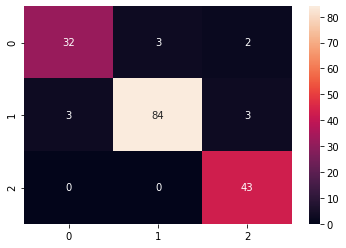

In [44]:
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)), annot = True)

In [45]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.86      0.91      0.89        35
         1.0       0.93      0.97      0.95        87
         2.0       1.00      0.90      0.95        48

    accuracy                           0.94       170
   macro avg       0.93      0.93      0.93       170
weighted avg       0.94      0.94      0.94       170



### 4.12% has been reduced in Test Accuracy because of reducing Dimensions
### Accuracy of SVM with Raw data is 97.64
### Accuracy of SVM with Raw data after dropping correlated columns is 98.23
### Accuracy of SVM with Principal Components is 93.52

### Reducing from 18 dimensions to just 7 dimensions with accuracy being affected by ~4 to 5% is better with respect to Processing Power and understandability

### Thus also reducing the Overfit which inturn would help in future predictions